In [41]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
df = sns.load_dataset("titanic")

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
df.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"Categorical: {categorical}")
print(f"Numerical: {numerical}")

Categorical: Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
Numerical: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


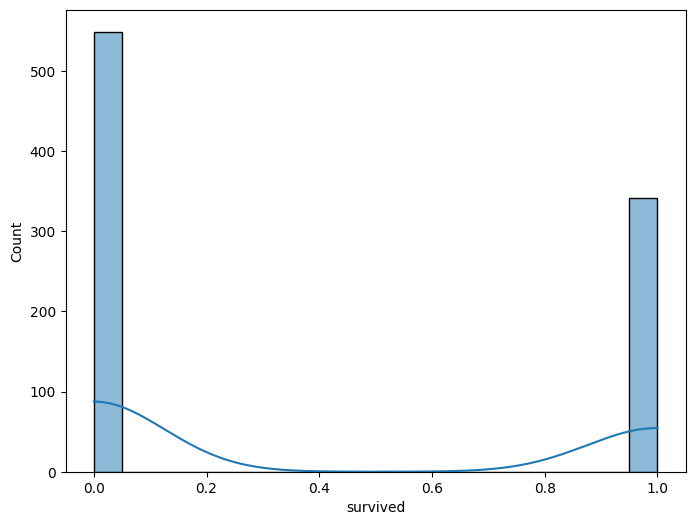

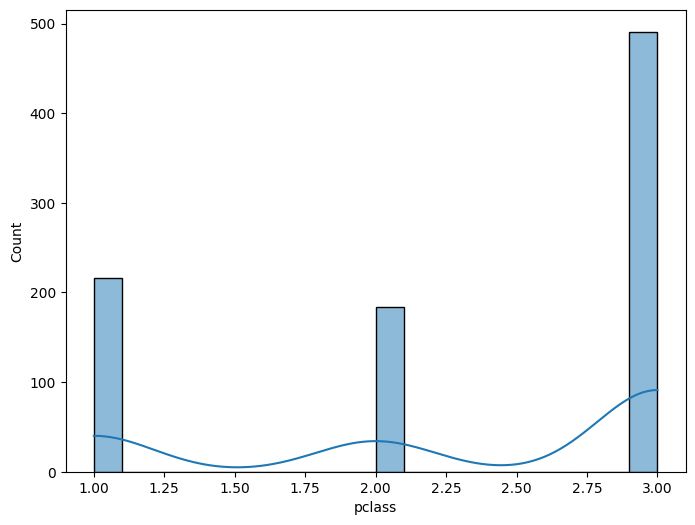

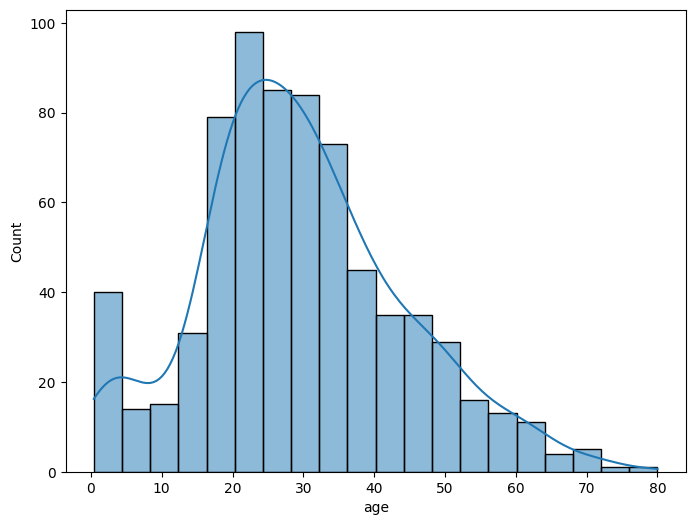

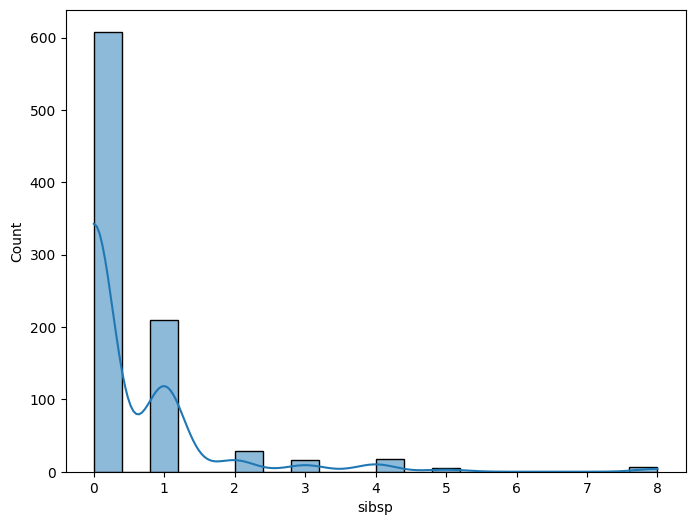

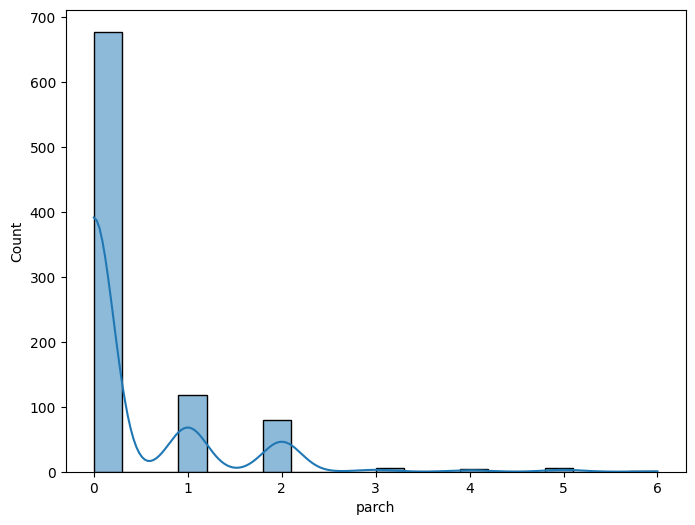

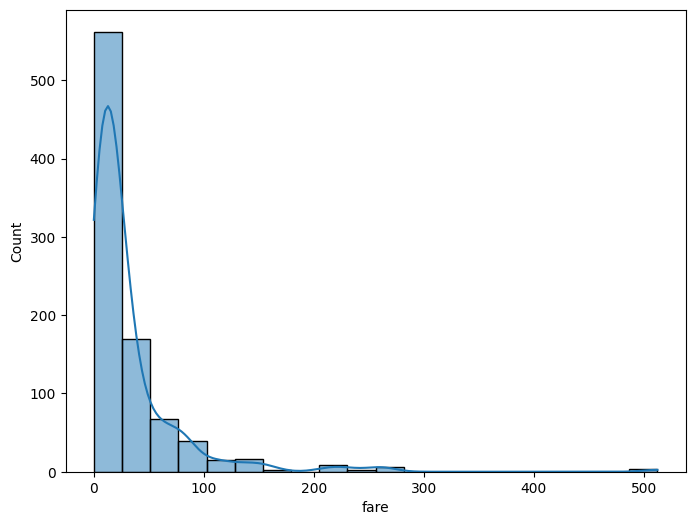

In [28]:
for col in numerical:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col],bins=20,kde=True)
    plt.show()


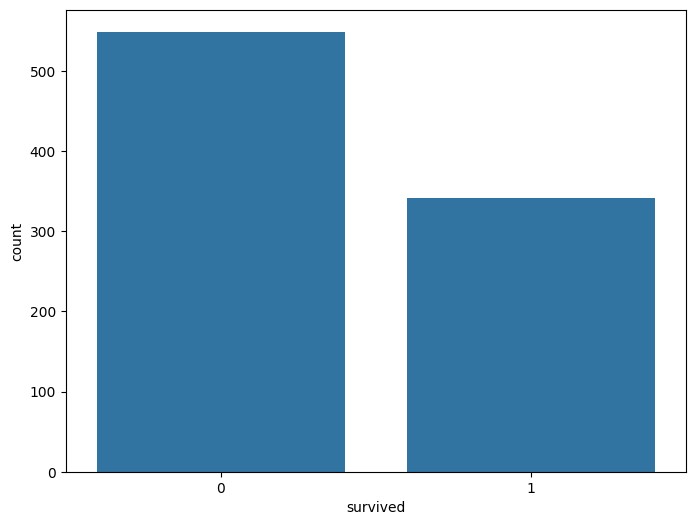

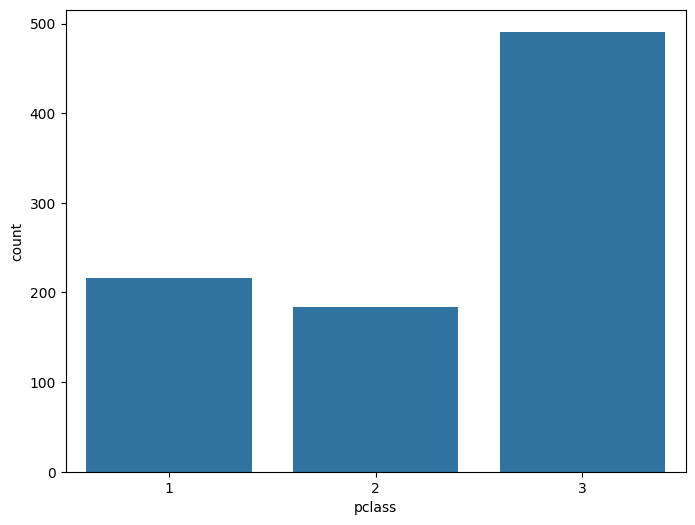

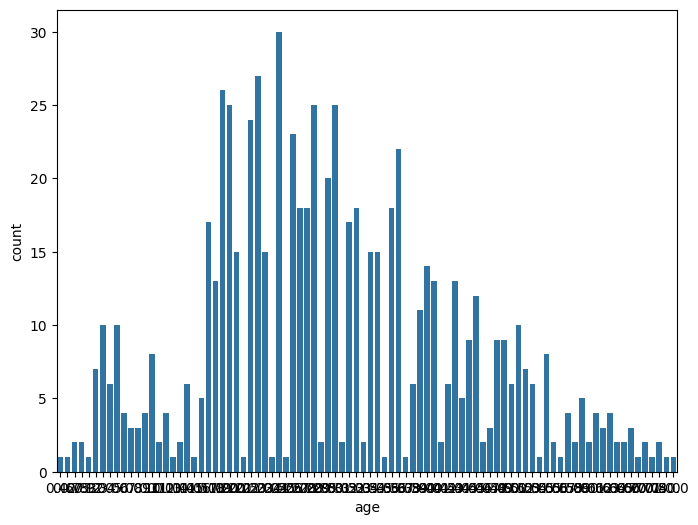

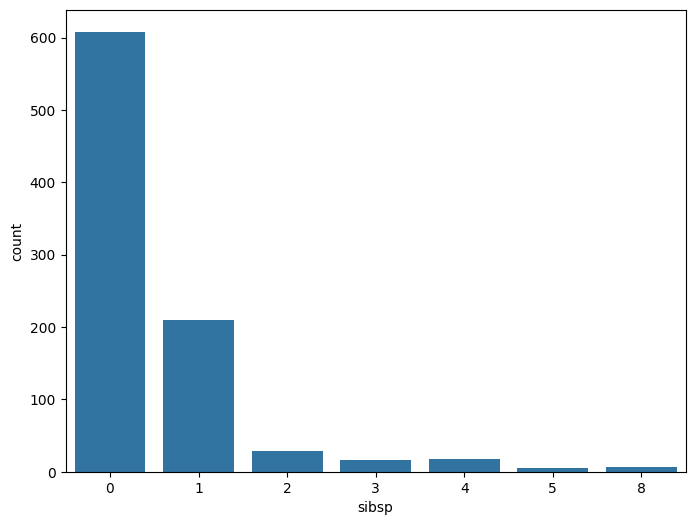

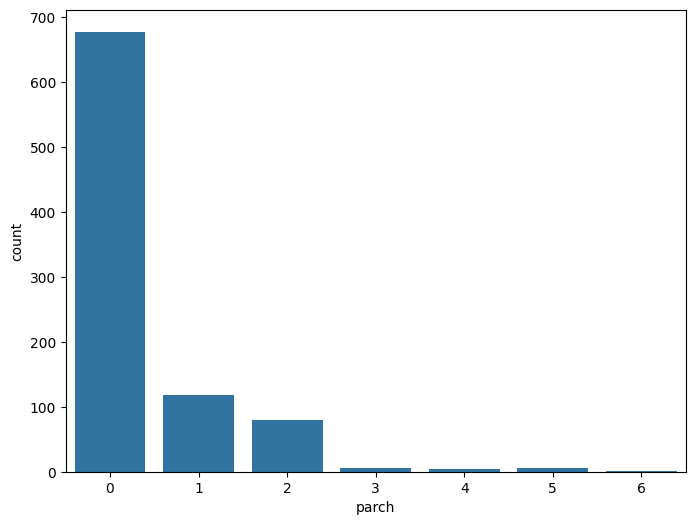

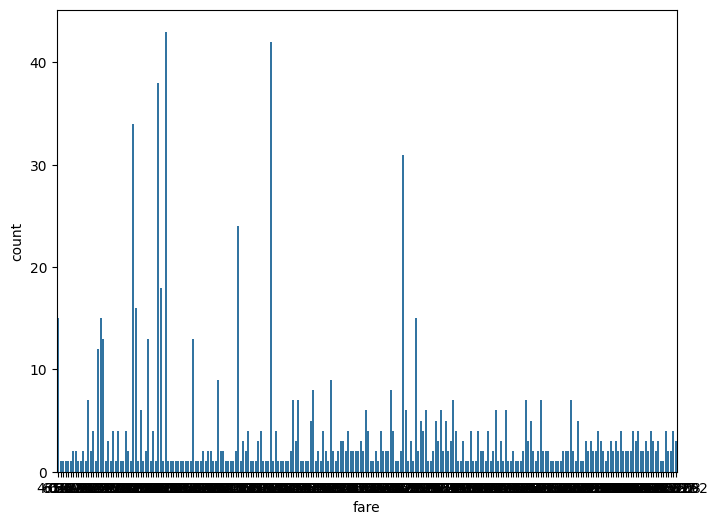

In [29]:
for col in numerical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col])
    plt.show()


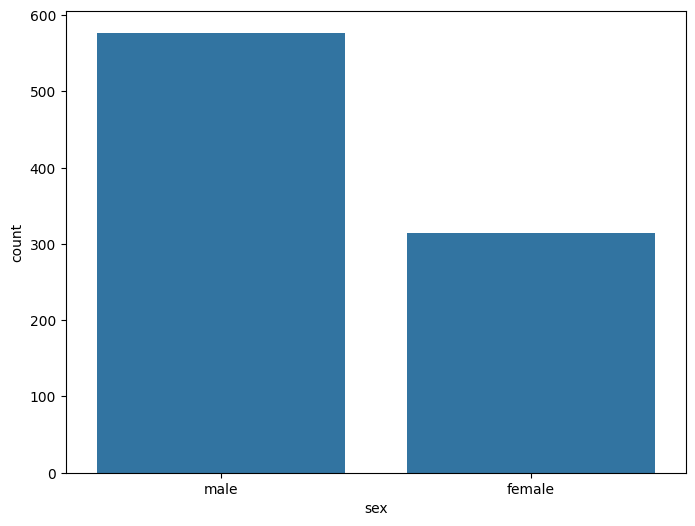

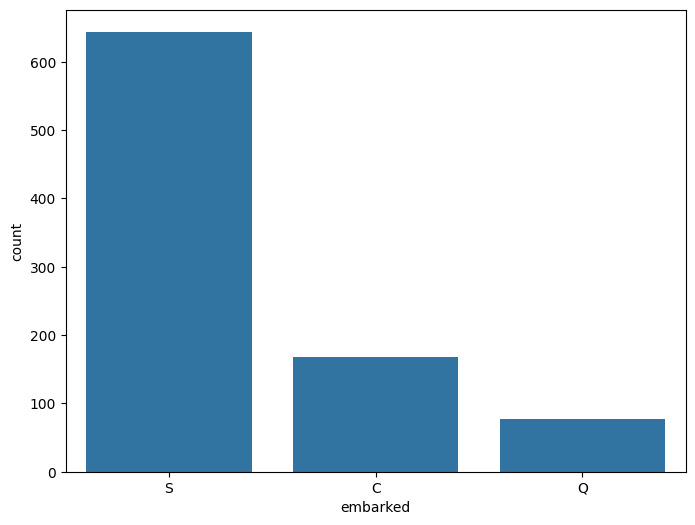

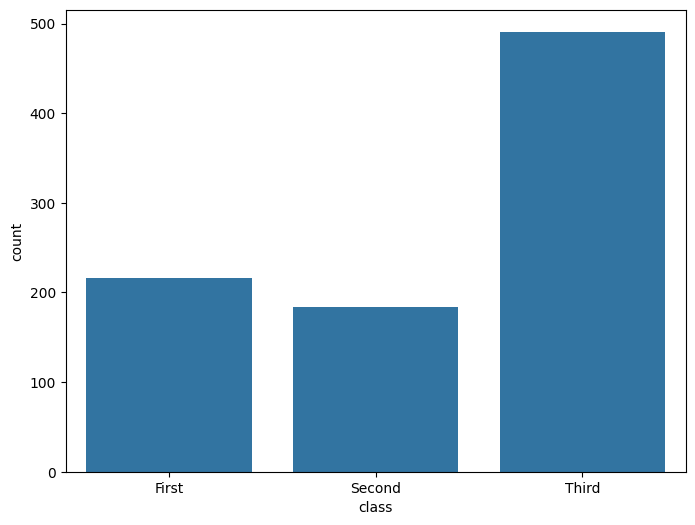

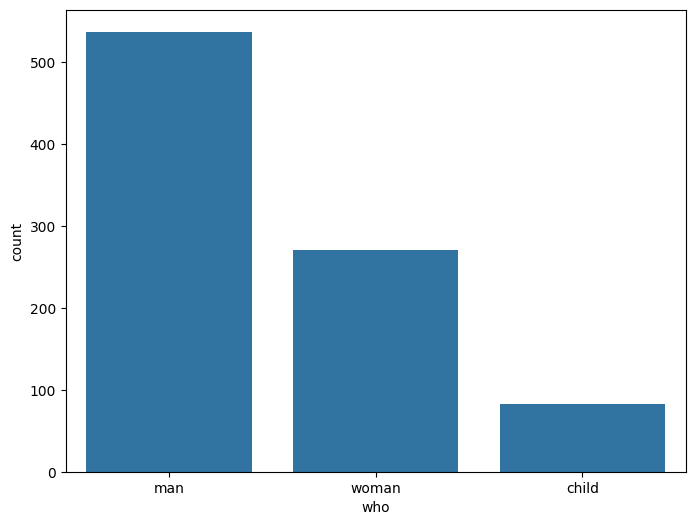

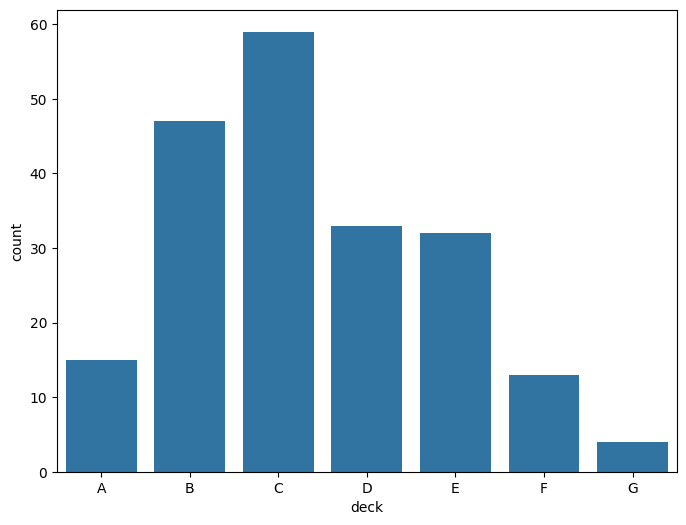

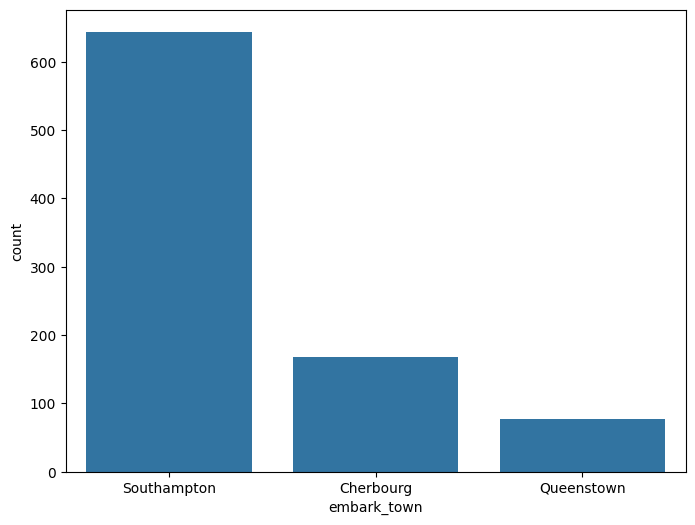

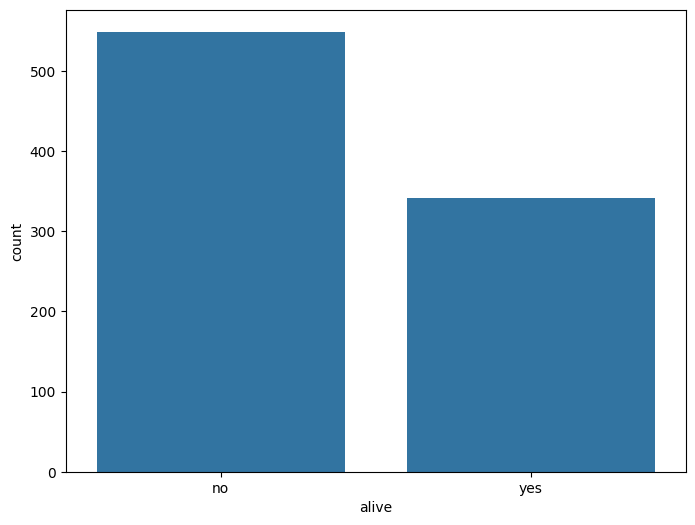

In [30]:
for col in categorical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col,data=df)
    plt.show()

<Axes: >

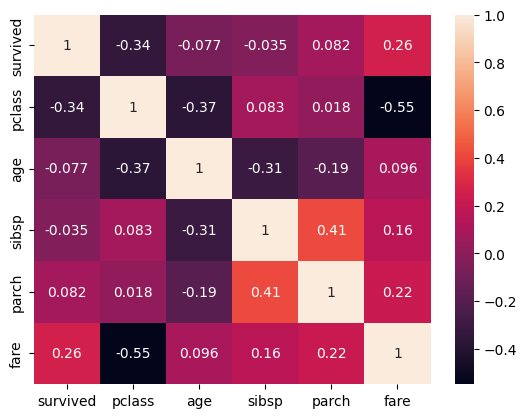

In [31]:
sns.heatmap(df[numerical].corr(),annot=True)

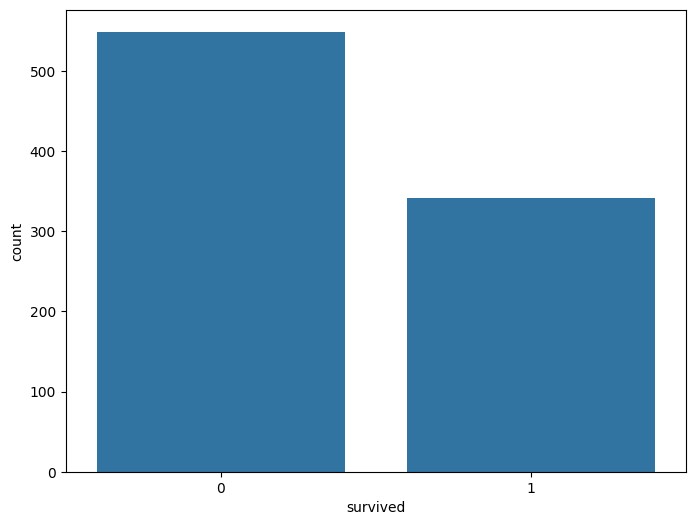

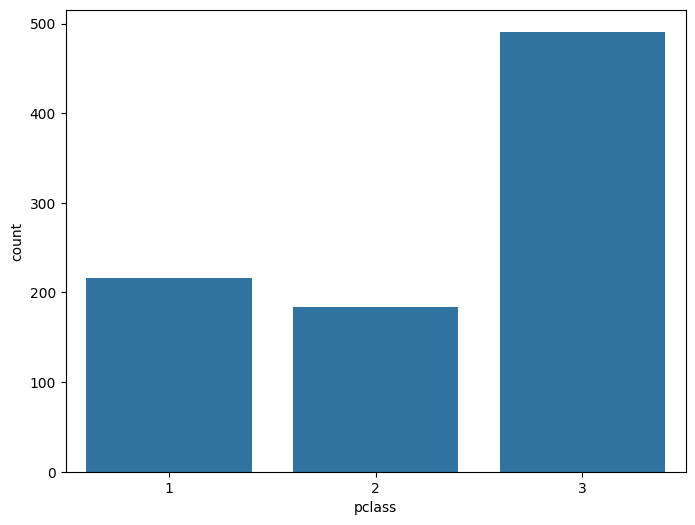

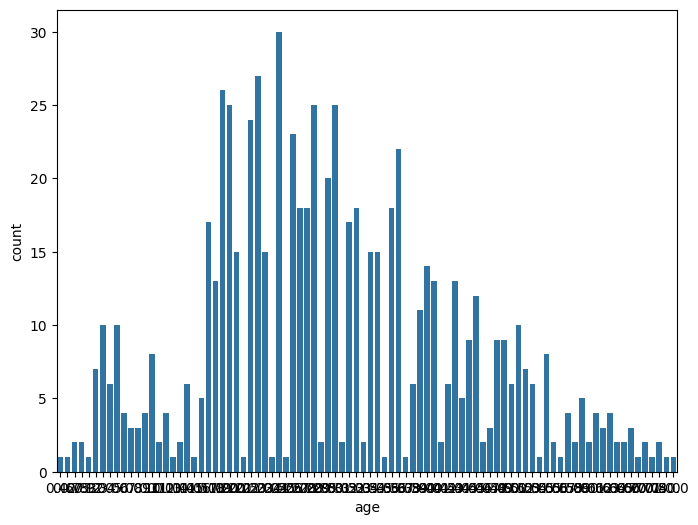

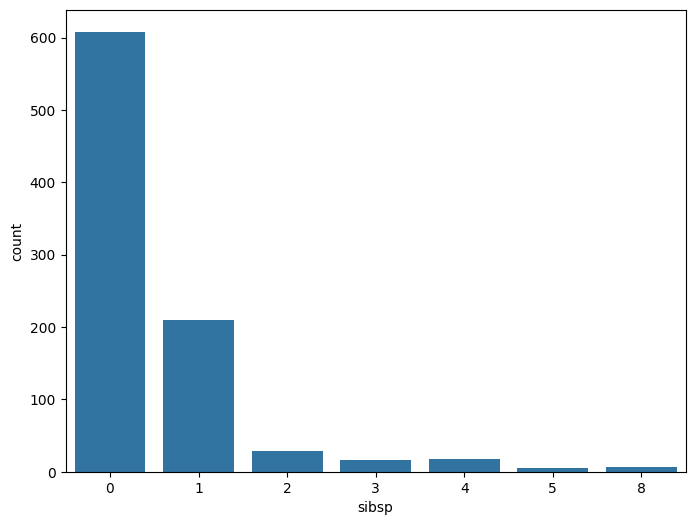

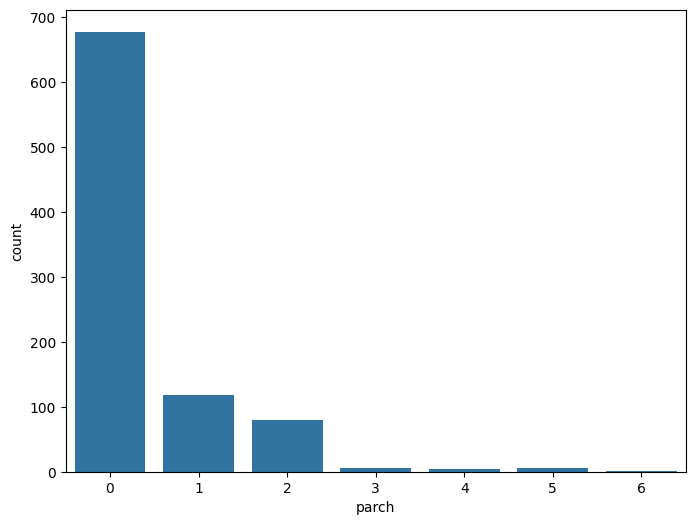

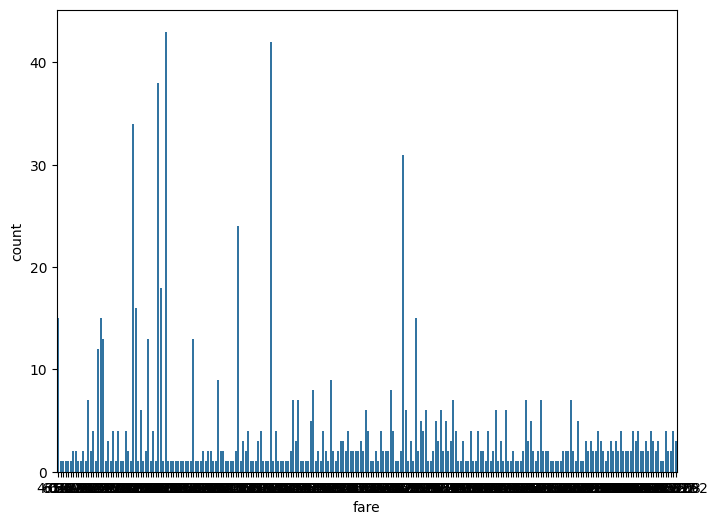

In [32]:
for col in numerical:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col])
    plt.show()


In [33]:
hot_en = [col for col in categorical if df[col].nunique() > 2]
label_en = [col for col in categorical if df[col].nunique() == 2]
print(f"hot: {hot_en}")
print(f"label: {label_en}")

hot: ['embarked', 'class', 'who', 'deck', 'embark_town']
label: ['sex', 'alive']


In [34]:
for col in label_en:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [35]:
df = pd.get_dummies(df, columns=hot_en)

In [36]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,True,0,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,1,False,...,False,False,True,False,False,False,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,1,True,...,False,False,False,False,False,False,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,1,False,...,False,False,True,False,False,False,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,0,True,...,False,False,False,False,False,False,False,False,False,True


In [37]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [40]:
X = df.drop(columns=["survived"])
y = df['survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [43]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
y_pred = log_reg.predict(X_test)

In [45]:
acc = accuracy_score(y_test,y_pred)
print(f"✅ Logistic Regression Accuracy: {acc:.4f}")

✅ Logistic Regression Accuracy: 1.0000


In [46]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[86  0]
 [ 0 50]]


In [47]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      1.00      1.00        50

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

